### Análisis de Asesinatos y Heridos por armas en USA 2019

Fuente: https://www.gunviolencearchive.org/

In [5]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [7]:
df= pd.read_excel('killed_usa_2019.xlsx')
df.head()

,Incident ID,Mes,Dia,Año,State,City Or County,Address,Killed,Injured
0,1582816,December,29,2019,Illinois,Danville,1803 block of Westview Ave,0,5
1,1582197,December,29,2019,New York,Buffalo,50 block of Henrietta Ave,1,3
2,1583444,December,29,2019,California,Ceres,800 block of Allacante Dr,0,5
3,1581590,December,27,2019,California,Modesto,1900 block of Vernon Ave,1,3
4,1581103,December,27,2019,Texas,Houston,500 block of Smart St,2,7


In [8]:
# eliminar año y dia
df = df.drop(["Año"], axis=1)
df.head(3)

,Incident ID,Mes,Dia,State,City Or County,Address,Killed,Injured
0,1582816,December,29,Illinois,Danville,1803 block of Westview Ave,0,5
1,1582197,December,29,New York,Buffalo,50 block of Henrietta Ave,1,3
2,1583444,December,29,California,Ceres,800 block of Allacante Dr,0,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Incident ID     417 non-null    int64 
 1   Mes             417 non-null    object
 2   Dia             417 non-null    int64 
 3   State           417 non-null    object
 4   City Or County  417 non-null    object
 5   Address         417 non-null    object
 6   Killed          417 non-null    int64 
 7   Injured         417 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 26.2+ KB


In [10]:
df.isnull().sum()
# no se encuentran datos NA
# df['dia'] = df['dia'].str.replace(",", "").astype(float) para reemplazar caracteres 

Incident ID       0
Mes               0
Dia               0
State             0
City Or County    0
Address           0
Killed            0
Injured           0
dtype: int64

**Análisis**

In [11]:
# Descripcion de los asesinados y heridos por arma año 2019, en USA
print(df.Killed.describe())
print(df.Injured.describe())

count    417.000000
mean       1.115108
std        1.896654
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max       23.000000
Name: Killed, dtype: float64
count    417.000000
mean       4.098321
std        2.385336
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       23.000000
Name: Injured, dtype: float64


In [12]:
# Cantidad de asesinados y heridos por Estado
k_I_by_State = df.groupby('State')['Killed',"Injured"].sum()
print(k_I_by_State)

# En asesinatos tambien se incluyen las suicidios.
# En Texas (73) y California (65), se produjeron la mayor cantidad de asesinatos por arma.
# En California (193), Illinois (182) y Texas (142), se produjeron la mayor cantidad de heridos productos de arma de fuego.

                      Killed  Injured
State                                
Alabama                   17       47
Arizona                    7       26
Arkansas                   3       20
California                65      193
Colorado                   2       20
Connecticut                1       12
Delaware                   0       10
District of Columbia       4       28
Florida                   20       54
Georgia                   16       74
Illinois                  28      182
Indiana                    6       49
Iowa                       3       11
Kansas                     5       16
Kentucky                   6       18
Louisiana                 20      106
Maryland                  12       85
Massachusetts              7       17
Michigan                   8       35
Minnesota                  1       12
Mississippi                8       21
Missouri                  20       60
Montana                    5        4
Nebraska                   0        4
Nevada      

In [13]:
# Porcentaje de asesinatos y heridos por Estado

k_I_by_State['porcentaje_Killed'] = (k_I_by_State['Killed'] / k_I_by_State['Killed'].sum()) * 100
k_I_by_State['porcentaje_Injured'] = (k_I_by_State['Injured'] / k_I_by_State['Injured'].sum()) * 100 
k_I_by_State 

,Killed,Injured,porcentaje_Killed,porcentaje_Injured
State,,,,
Alabama,17,47,3.655914,2.750146
Arizona,7,26,1.505376,1.521358
Arkansas,3,20,0.645161,1.170275
California,65,193,13.978495,11.293154
Colorado,2,20,0.430108,1.170275
Connecticut,1,12,0.215054,0.702165
Delaware,0,10,0.000000,0.585138
District of Columbia,4,28,0.860215,1.638385
Florida,20,54,4.301075,3.159743


Text(0.5, 1.0, 'Cantidad de Asesinados por Estado en USA 2019')

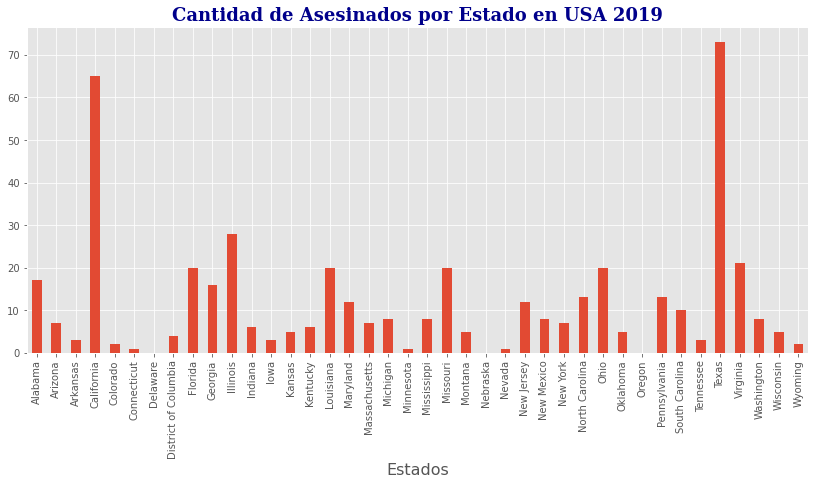

In [14]:
plt.figure(figsize=(14,6))
p = df.groupby('State').sum()['Killed'].plot(kind='bar')
plt.xlabel("Estados", size = 16,)
plt.ylabel("", size = 16)
plt.title("Cantidad de Asesinados por Estado en USA 2019", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})

Text(0.5, 1.0, 'Cantidad de Heridos por Estado en USA 2019')

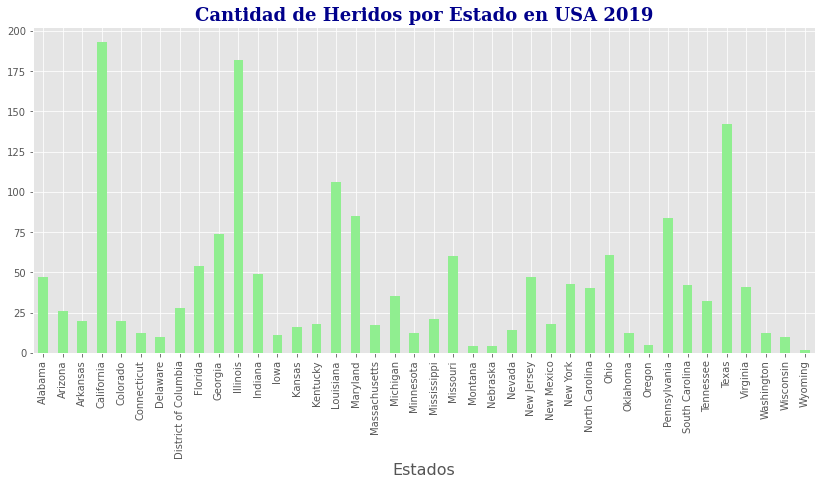

In [15]:
plt.figure(figsize=(14,6))
df.groupby('State').sum()['Injured'].plot(kind='bar',color="lightgreen")
plt.xlabel("Estados", size = 16,)
plt.ylabel("", size = 16)
plt.title("Cantidad de Heridos por Estado en USA 2019", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})

In [16]:
# Cantidad de asesinatos y heridos por mes
k_I_by_Mes = df.groupby('Mes')['Killed',"Injured"].sum()
print(k_I_by_Mes)

# En agosto se produce el maximo de asesinatos y en Junio se produce el maximo de heridos por arma de fuego

           Killed  Injured
Mes                       
April          25      127
August         70      209
December       37      156
February       36       62
January        45       86
July           33      185
June           37      225
March          12       87
May            49      204
November       27      129
October        48      124
September      46      115


Text(0.5, 1.0, 'Cantidad de Asesinatos por Mes en USA 2019')

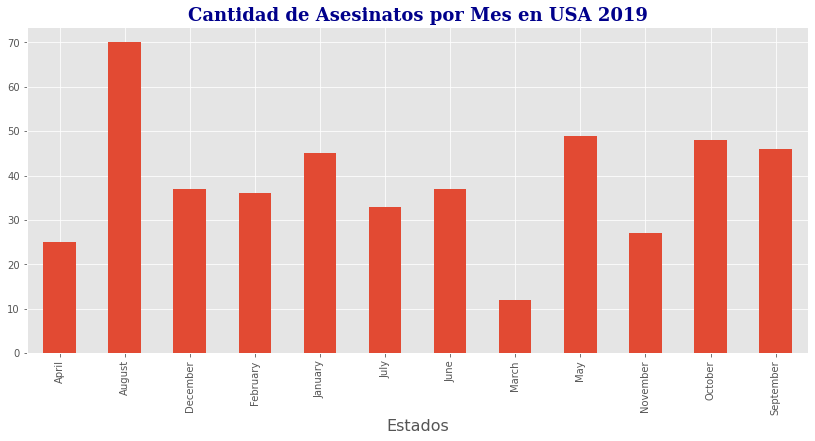

In [17]:
plt.figure(figsize=(14,6))
df.groupby('Mes').sum()['Killed'].plot(kind='bar')
plt.xlabel("Estados", size = 16,)
plt.ylabel("", size = 16)
plt.title("Cantidad de Asesinatos por Mes en USA 2019", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})

Text(0.5, 1.0, 'Cantidad de Heridos por Mes en USA 2019')

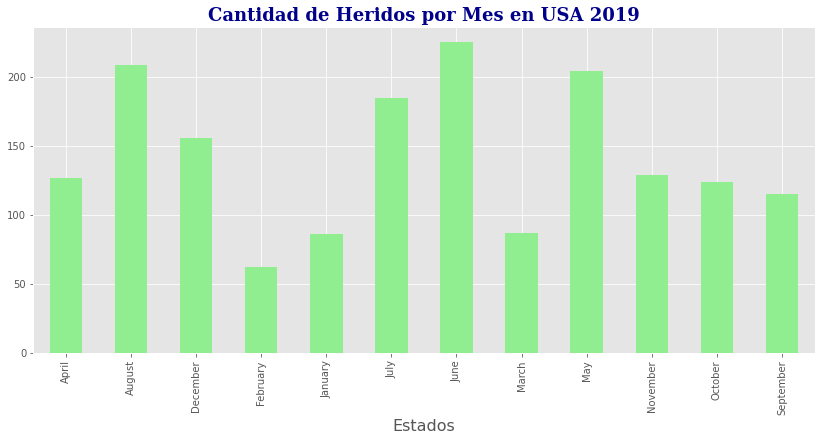

In [18]:
plt.figure(figsize=(14,6))
df.groupby('Mes').sum()['Injured'].plot(kind='bar',color="lightgreen")
plt.xlabel("Estados", size = 16,)
plt.ylabel("", size = 16)
plt.title("Cantidad de Heridos por Mes en USA 2019", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})

In [19]:
# Que dias del mes se producen mas asesinatos y heridos?

k_I_by_Dia = df.groupby('Dia')['Killed','Injured'].sum()
k_I_by_Dia['porcentaje_Killed'] = (k_I_by_Dia['Killed'] / k_I_by_Dia['Killed'].sum()) * 100
k_I_by_Dia['porcentaje_Injured'] = (k_I_by_Dia['Injured'] / k_I_by_Dia['Injured'].sum()) * 100 

k_I_by_Dia 

,Killed,Injured,porcentaje_Killed,porcentaje_Injured
Dia,,,,
1,11,101,2.365591,5.909889
2,12,37,2.580645,2.165009
3,36,69,7.741935,4.037449
4,31,100,6.666667,5.851375
5,4,45,0.860215,2.633119
6,15,46,3.225806,2.691633
7,16,60,3.440860,3.510825
8,14,27,3.010753,1.579871
9,4,37,0.860215,2.165009


Text(0.5, 1.0, 'Cantidad de Asesinatos por dia en USA 2019')

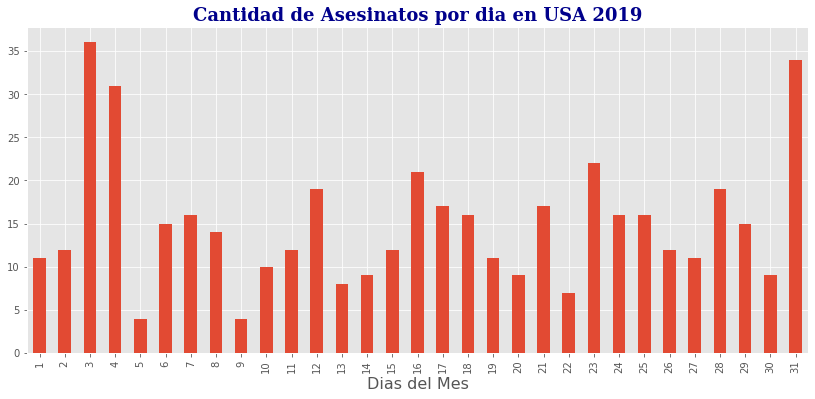

In [20]:
plt.figure(figsize=(14,6))
df.groupby('Dia').sum()['Killed'].plot(kind='bar')
plt.xlabel("Dias del Mes", size = 16,)
plt.ylabel("", size = 16)
plt.title("Cantidad de Asesinatos por dia en USA 2019", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})

# A fines y a principios de mes se producen la mayor cantidad de asesinatos

Text(0.5, 1.0, 'Cantidad de Heridos por dia en USA 2019')

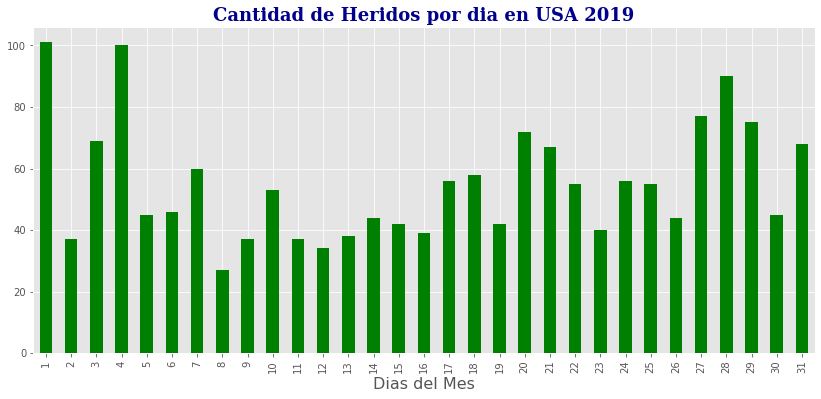

In [21]:
plt.figure(figsize=(14,6))
df.groupby('Dia').sum()['Injured'].plot(kind='bar',color="green")
plt.xlabel("Dias del Mes", size = 16,)
plt.ylabel("", size = 16)
plt.title("Cantidad de Heridos por dia en USA 2019", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})

**Conclusiones Preliminares**

- En Texas (73) y California (65), se produjeron la mayor cantidad de asesinatos por arma de fuego.
- En California (193), Illinois (182) y Texas (142), se produjeron la mayor cantidad de heridos productos de arma de fuego.
- El mes de Agosto se produjo la mayor cantidad de asesinatos.
- El mes de Junio se produjo la mayor cantidad de heridos por arma de fuego.
- A fines y a principios de mes se producen la mayor cantidad de asesinatos. 